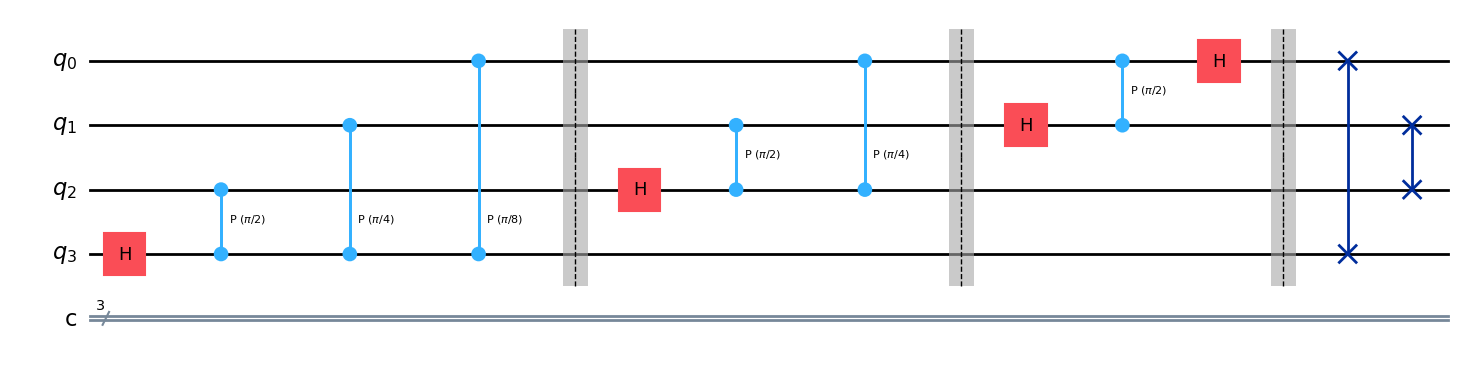

In [62]:
from math import pi
from qiskit import QuantumCircuit


num_qubits = 3
qc = QuantumCircuit(num_qubits +1, num_qubits)

qc.h(3)
qc.cp(pi/2, 2,3)
qc.cp(pi/4, 1,3)
qc.cp(pi/8, 0,3)

qc.barrier()

qc.h(2)
qc.cp(pi/2, 1,2)
qc.cp(pi/4, 0,2)

qc.barrier()

qc.h(1)
qc.cp(pi/2, 0,1)

qc.h(0)
qc.barrier()

qc.swap(0,3)
qc.swap(1,2)
qc.draw('mpl')

# 2. Czy operacja jest unitarna?

Jest to kwantowa transformata Fouriera (Quantum Fourier Transform, QFT), która jest operacją unitarną.
Oznacza to, że układ przekształce stany kwantowe w sposób zachowujący ich normę. 

# 3. Jaką operację realizuje?

Transformata Fouriera kwantowa (QFT, od ang. Quantum Fourier Transform) to kwantowy odpowiednik klasycznej dyskretnej transformaty Fouriera. Operuje ona na stanie kwantowym, składającym się z kubitów, i jest kluczowym elementem wielu algorytmów kwantowych, takich jak algorytm faktoryzacji Shora czy algorytm szukania Shora.

W QFT, transformacja przekształca sekwencję wejściową kubitów w nową sekwencję kubitów, gdzie amplitudy prawdopodobieństwa tych kubitów odpowiadają wartościom dyskretnej transformaty Fouriera wejściowej sekwencji. Można to interpretować jako rodzaj mapowania wartości amplitud na wartości częstotliwości, które reprezentują różne stany bazowe.

# 4. Kod ten jest bardzo uproszczony i nie będzie skuteczny dla większych liczb, ale może służyć jako punkt wyjścia do dalszej eksploracji algorytmu Shora i jego implementacji w Qiskit.

In [13]:
from math import gcd
from qiskit import QuantumCircuit, assemble
from qiskit.circuit.library import QFT
from qiskit_aer import Aer

def qpe_amod15(a, n):
    """ Tworzy obwód dla Quantum Phase Estimation dla a^x mod 15 """
    qc = QuantumCircuit(n+4, n)
    for q in range(n):
        qc.h(q)  # Inicjalizacja w stanie |+>
    qc.x(3+n)
    for q in range(n):
        qc.append(c_amod15(a, 2**q), [q] + [i+n for i in range(4)])
    qc.append(QFT(n).inverse(), range(n))  # Dodanie odwróconej QFT
    qc.measure(range(n), range(n))
    # Uruchomienie obwodu na symulatorze
    sim = Aer.get_backend('aer_simulator')
    qc.draw('mpl')
    qobj = assemble(qc)
    result = sim.run(qobj).result()
    counts = result.get_counts()
    return counts

def c_amod15(a, power):
    """ Obwód dla a^power mod 15 """
    if a not in [2, 7, 8, 11, 13]:
        raise ValueError(f"Ta funkcja nie wspiera a={a}.")
    U = QuantumCircuit(4)
    for iteration in range(power):
        if a in [2, 13]:
            U.swap(0, 1)
            U.swap(1, 2)
            U.swap(2, 3)
        if a in [7, 8]:
            U.swap(2, 3)
            U.swap(1, 2)
            U.swap(0, 1)
        if a == 11:
            U.swap(1, 3)
            U.swap(0, 2)
        if a in [7, 11, 13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{{power}} mod 15"
    c_U = U.control()
    return c_U

def shor(N):
    """ Główna funkcja realizująca faktoryzację liczby N za pomocą algorytmu Shora """
    n = 4  # Liczba qubitów w fazie estymacji, zależna od N
    for a in range(2, N):
        if gcd(a, N) > 1:
            return gcd(a, N)
        counts = qpe_amod15(a, n)

# Testujemy dla N=15
print('Test transformacji dla liczby 15, dający wynik: ', shor(15))

/tmp/ipykernel_1550/1261389510.py:20: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = sim.run(qobj).result()


Test transformacji dla liczby 15, dający wynik:  3
